## Quiz 1

In [32]:

library(rtracklayer)
library(AnnotationHub)
library(tidyverse)
library(GenomicRanges)


**Question 1**: Use the AnnotationHub package to obtain data on "CpG Islands" in the human genome.

In [6]:
# Create annotation hub object
ah <- AnnotationHub()

snapshotDate(): 2021-05-18



In [22]:
# retrive CpG Island Data
ah.human <- subset(ah,species == "Homo sapiens")
ah.human.cpg <- query(ah.human, "CpG Islands")
ah.human.cpg

AnnotationHub with 4 records
# snapshotDate(): 2021-05-18
# $dataprovider: UCSC
# $species: Homo sapiens
# $rdataclass: GRanges
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH5086"]]' 

           title      
  AH5086 | CpG Islands
  AH5204 | CpG Islands
  AH5344 | CpG Islands
  AH5463 | CpG Islands

In [23]:
ah.human.cpg.AH5086 <- ah.human.cpg[["AH5086"]]
ah.human.cpg.AH5086

loading from cache



GRanges object with 28691 ranges and 1 metadata column:
                       seqnames        ranges strand |        name
                          <Rle>     <IRanges>  <Rle> | <character>
      [1]                  chr1   28736-29810      * |    CpG:_116
      [2]                  chr1 135125-135563      * |     CpG:_30
      [3]                  chr1 327791-328229      * |     CpG:_29
      [4]                  chr1 437152-438164      * |     CpG:_84
      [5]                  chr1 449274-450544      * |     CpG:_99
      ...                   ...           ...    ... .         ...
  [28687]  chr9_gl000201_random   15651-15909      * |     CpG:_30
  [28688]  chr9_gl000201_random   26397-26873      * |     CpG:_43
  [28689] chr11_gl000202_random   16284-16540      * |     CpG:_23
  [28690] chr17_gl000204_random   54686-57368      * |    CpG:_228
  [28691] chr17_gl000205_random 117501-117801      * |     CpG:_23
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

In [13]:
seqnames(ah.human.cpg.AH5086) # all chromosome sequence names in the GRanges Object

factor-Rle of length 28691 with 69 runs
  Lengths:                  2462 ...                     1
  Values :        chr1           ... chr17_gl000205_random
Levels(93): chr1 chr2 chr3 ... chrUn_gl000247 chrUn_gl000248 chrUn_gl000249

In [25]:
# Split GRanges by SeqNames, retuen GRangeslist object where e
ah.human.cpg.AH5086.splitBySeqNames <- split(ah.human.cpg.AH5086,seqnames(ah.human.cpg.AH5086))
ah.human.cpg.AH5086.splitBySeqNames

GRangesList object of length 93:
$chr1
GRanges object with 2462 ranges and 1 metadata column:
         seqnames              ranges strand |        name
            <Rle>           <IRanges>  <Rle> | <character>
     [1]     chr1         28736-29810      * |    CpG:_116
     [2]     chr1       135125-135563      * |     CpG:_30
     [3]     chr1       327791-328229      * |     CpG:_29
     [4]     chr1       437152-438164      * |     CpG:_84
     [5]     chr1       449274-450544      * |     CpG:_99
     ...      ...                 ...    ... .         ...
  [2458]     chr1 249132081-249133310      * |    CpG:_130
  [2459]     chr1 249141564-249142796      * |    CpG:_145
  [2460]     chr1 249152412-249153419      * |     CpG:_86
  [2461]     chr1 249167409-249168010      * |     CpG:_48
  [2462]     chr1 249200253-249200721      * |     CpG:_58
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

...
<92 more elements>

In [26]:
autsome.Names <- c(paste("chr", 1:22, sep=""))
autosomes <- ah.human.cpg.AH5086.splitBySeqNames[autsome.Names]
unlist(autosomes)

GRanges object with 26641 ranges and 1 metadata column:
        seqnames            ranges strand |        name
           <Rle>         <IRanges>  <Rle> | <character>
   chr1     chr1       28736-29810      * |    CpG:_116
   chr1     chr1     135125-135563      * |     CpG:_30
   chr1     chr1     327791-328229      * |     CpG:_29
   chr1     chr1     437152-438164      * |     CpG:_84
   chr1     chr1     449274-450544      * |     CpG:_99
    ...      ...               ...    ... .         ...
  chr22    chr22 51135671-51136118      * |     CpG:_44
  chr22    chr22 51142803-51143308      * |     CpG:_38
  chr22    chr22 51158387-51160060      * |    CpG:_167
  chr22    chr22 51169028-51170019      * |     CpG:_81
  chr22    chr22 51221773-51222317      * |     CpG:_63
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

Loading required package: regioneR



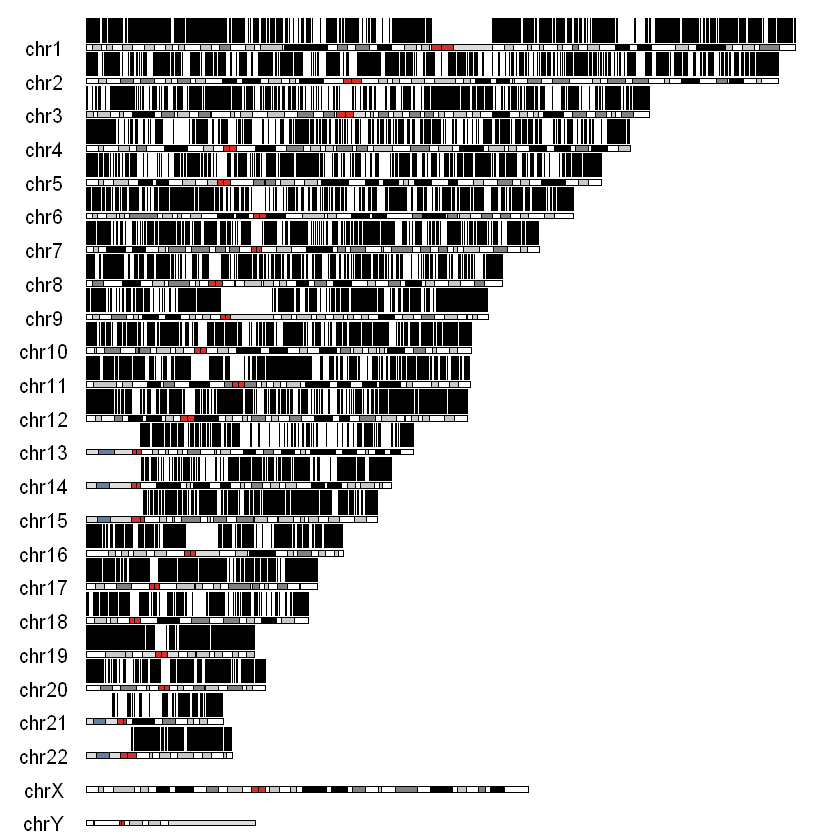

In [16]:
#BiocManager::install("karyoploteR")
library(karyoploteR)
kp <- plotKaryotype()
kpPlotRegions(kp, data= unlist(autosomes))

**Question 2.** How many CpG Islands exists on chromosome 4.

In [23]:
autosomes[4]

GRangesList object of length 1:
$chr4
GRanges object with 1031 ranges and 1 metadata column:
         seqnames              ranges strand |        name
            <Rle>           <IRanges>  <Rle> | <character>
     [1]     chr4         53199-53672      * |     CpG:_46
     [2]     chr4       107147-107898      * |     CpG:_89
     [3]     chr4       124333-124841      * |     CpG:_37
     [4]     chr4       206378-206892      * |     CpG:_49
     [5]     chr4       298804-299312      * |     CpG:_47
     ...      ...                 ...    ... .         ...
  [1027]     chr4 190939802-190940591      * |     CpG:_69
  [1028]     chr4 190942735-190944898      * |    CpG:_196
  [1029]     chr4 190959045-190960011      * |     CpG:_72
  [1030]     chr4 190962112-190962689      * |     CpG:_59
  [1031]     chr4 190986383-191013609      * |   CpG:_2005
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome


**Question 3**: Obtain the data for the H3K4me3 histone modification for the H1 cell line from Epigenomics Roadmap, using AnnotationHub. Subset these regions to only keep regions mapped to the autosomes (chromosomes 1 to 22). How many bases does these regions cover?

In [7]:
## retrieve the record
ah.H3K4me3 <- query(ah, c("H3K4me3", "narrowpeak", "E003")) # E003 = Embryonic Stem Cell 
ah.H3K4me3

AnnotationHub with 1 record
# snapshotDate(): 2021-05-18
# names(): AH29884
# $dataprovider: BroadInstitute
# $species: Homo sapiens
# $rdataclass: GRanges
# $rdatadateadded: 2015-05-06
# $title: E003-H3K4me3.narrowPeak.gz
# $description: Narrow ChIP-seq peaks for consolidated epigenomes from Epige...
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: BED
# $sourceurl: http://egg2.wustl.edu/roadmap/data/byFileType/peaks/consolidat...
# $sourcesize: 803904
# $tags: c("EpigenomeRoadMap", "peaks", "consolidated", "narrowPeak",
#   "E003", "ESC", "ESC.H1", "H1 Cells") 
# retrieve record with 'object[["AH29884"]]' 

In [8]:
## retriever record narrowpeak
ah.H3K4me3.AH29884 <- ah.H3K4me3[["AH29884"]]
ah.H3K4me3.AH29884

loading from cache

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org




GRanges object with 42194 ranges and 6 metadata columns:
          seqnames              ranges strand |        name     score
             <Rle>           <IRanges>  <Rle> | <character> <numeric>
      [1]    chr16   20751574-20753603      * |      Rank_1      3574
      [2]     chr2   85764276-85768872      * |      Rank_2      3548
      [3]     chr1 110879747-110884121      * |      Rank_3      3486
      [4]    chr17   74730356-74735029      * |      Rank_4      3439
      [5]     chr1 115298643-115301088      * |      Rank_5      3414
      ...      ...                 ...    ... .         ...       ...
  [42190]    chr10 125730091-125730283      * |  Rank_42190        20
  [42191]     chr7   72934005-72934138      * |  Rank_42191        20
  [42192]     chr9   74373873-74374012      * |  Rank_42192        20
  [42193]    chr19   18718610-18718743      * |  Rank_42193        20
  [42194]    chr15   90775616-90775749      * |  Rank_42194        20
          signalValue    pValue  

In [10]:
## extract autosomes
autsome.Names <- c(paste("chr", 1:22, sep=""))
H3K4me3.splitBySeqNames <- split(ah.H3K4me3.AH29884, seqnames(ah.H3K4me3.AH29884))
H3K4me3.autosomes <- H3K4me3.splitBySeqNames[autsome.Names]


In [34]:
## check the number of regions cover
sum(width(unlist(H3K4me3.autosomes)))

[1] 41135164

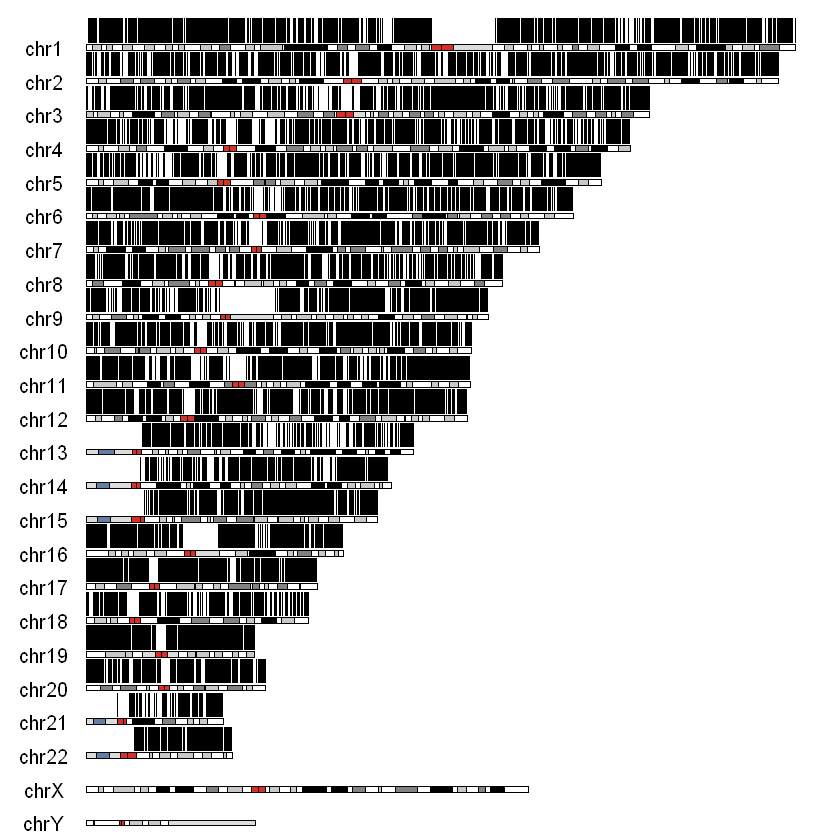

In [25]:
# H3K4me3 pattern in Embryonic Stem Cell (E003) autosome
library(karyoploteR)
kp <- plotKaryotype()
kpPlotRegions(kp, data= unlist(H3K4me3.autosomes))

**Question 4** Obtain the data for the H3K27me3 histone modification for the H1 cell line from Epigenomics Roadmap, using the AnnotationHub package. Subset these regions to only keep regions mapped to the autosomes. In the return data, each region has an associated "signalValue". 

What is the mean signalValue across all regions on the standard chromosomes?

In [11]:
## retrieve the record
ah.H3K27me3 <- query(ah, c("H3K27me3", "narrowpeak", "E003")) # E003 = Embryonic Stem Cell 

ah.H3K27me3

AnnotationHub with 1 record
# snapshotDate(): 2021-05-18
# names(): AH29892
# $dataprovider: BroadInstitute
# $species: Homo sapiens
# $rdataclass: GRanges
# $rdatadateadded: 2015-05-06
# $title: E003-H3K27me3.narrowPeak.gz
# $description: Narrow ChIP-seq peaks for consolidated epigenomes from Epige...
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: BED
# $sourceurl: http://egg2.wustl.edu/roadmap/data/byFileType/peaks/consolidat...
# $sourcesize: 1926389
# $tags: c("EpigenomeRoadMap", "peaks", "consolidated", "narrowPeak",
#   "E003", "ESC", "ESC.H1", "H1 Cells") 
# retrieve record with 'object[["AH29892"]]' 

In [12]:
## retriever record narrowpeak
ah.H3K27me3.AH29892 <- ah.H3K27me3[["AH29892"]]

## extract autosomes
autsome.Names <- c(paste("chr", 1:22, sep=""))
H3K27me3.splitBySeqNames <- split(ah.H3K27me3.AH29892, seqnames(ah.H3K27me3.AH29892))
H3K27me3.autosomes <- H3K27me3.splitBySeqNames[autsome.Names]

# check all autosomes
unlist(H3K27me3.autosomes)

loading from cache

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org




GRanges object with 120340 ranges and 6 metadata columns:
        seqnames              ranges strand |        name     score signalValue
           <Rle>           <IRanges>  <Rle> | <character> <numeric>   <numeric>
   chr1     chr1   47685654-47702353      * |      Rank_7      2237     52.7690
   chr1     chr1 221048224-221071054      * |      Rank_9      2235     51.3662
   chr1     chr1   50879272-50899079      * |     Rank_30      2085     48.6627
   chr1     chr1   46950343-46961192      * |     Rank_42      2040     45.1533
   chr1     chr1 224802506-224807753      * |     Rank_45      2029     47.6489
    ...      ...                 ...    ... .         ...       ...         ...
  chr22    chr22   26701857-26701970      * | Rank_123201        20     2.24116
  chr22    chr22   30291593-30291706      * | Rank_123202        20     2.24116
  chr22    chr22   31514021-31514134      * | Rank_123203        20     2.24116
  chr22    chr22   33605218-33605331      * | Rank_123204     

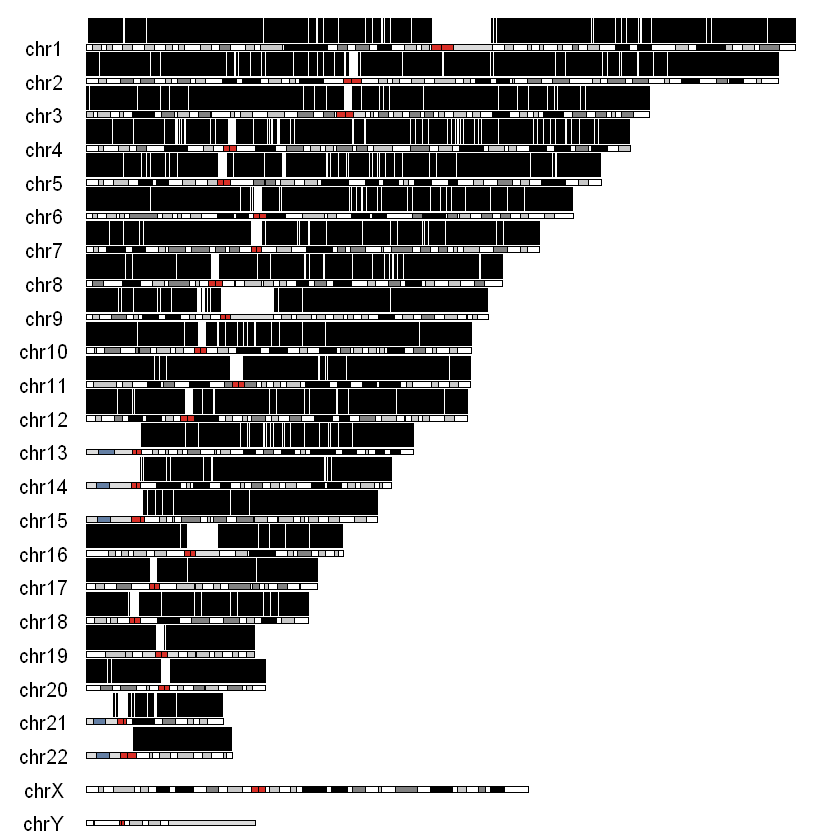

In [45]:
# H3K27me3 pattern in Embryonic Stem Cell (E003) autosome
library(karyoploteR)
kp <- plotKaryotype()
kpPlotRegions(kp, data= unlist(H3K27me3.autosomes))

In [44]:
# calculate mean signalValue
## create a subset of extracted autosomes
ah.H3K27me3.autosomes.subset <- subset(unlist(H3K27me3.autosomes), seqnames %in% autsome.Names)

mean.signalValue <- mean(ah.H3K27me3.autosomes.subset$signalValue)
mean.signalValue 

[1] 4.770728

**Question 5**: Using the regions we have obtained above, how many bases on the standard chromosomes are bivalently marked? (`Bivalent regions are bound by both H3K4me3 and H3K27me3`.)

In [20]:
## intersect between two chromosomes
bivalent.histones <- GenomicRanges::intersect(unlist(H3K4me3.autosomes), unlist(H3K27me3.autosomes),ignore.strand=TRUE)
sum(width(bivalent.histones))

[1] 10289096

**Question 6**: how big a fraction (expressed as a number between 0 and 1) of the bivalent regions, overlap one or more CpG Islands? (We will examine the extent to which bivalent regions overlap CpG Islands.)

In [36]:
# find the overlap region between CpG Island and bivalent
cpg.autosomes <- autosomes
cpg.bivalent.histones <- findOverlaps(bivalent.histones,unlist(cpg.autosomes))



In [37]:
# calculate the fraction of the bivalent regions overlap CpG Islands
fraction.bivalent <- length(unique(queryHits(cpg.bivalent.histones)))/length(bivalent.histones)
fraction.bivalent

[1] 0.5383644


**Question 7**: How big a fraction (expressed as a number between 0 and 1) of the bases which are part of CpG Islands, are also bivalent marked?

In [48]:
cpg.bivalent.intersect <- GenomicRanges::intersect(bivalent.histones,unlist(cpg.autosomes))

cpg.bivalent.intersect.fraction <- sum(width(GenomicRanges::reduce(cpg.bivalent.intersect)))/sum(width(unlist(cpg.autosomes)))
cpg.bivalent.intersect.fraction 

[1] 0.241688

**Question 8**: How many bases are bivalently marked within 10kb of CpG Islands?


In [50]:
# extract CpG Islands within 10kb
kb <- 1000
# 10kb ech side
size10kb <- 2 * 10 * kb

cpg.10kb <- resize(unlist(cpg.autosomes), width = size10kb  + width(unlist(cpg.autosomes)), fix = "center")

cpg.10kb

GRanges object with 26641 ranges and 1 metadata column:
        seqnames            ranges strand |        name
           <Rle>         <IRanges>  <Rle> | <character>
   chr1     chr1       18736-39810      * |    CpG:_116
   chr1     chr1     125125-145563      * |     CpG:_30
   chr1     chr1     317791-338229      * |     CpG:_29
   chr1     chr1     427152-448164      * |     CpG:_84
   chr1     chr1     439274-460544      * |     CpG:_99
    ...      ...               ...    ... .         ...
  chr22    chr22 51125671-51146118      * |     CpG:_44
  chr22    chr22 51132803-51153308      * |     CpG:_38
  chr22    chr22 51148387-51170060      * |    CpG:_167
  chr22    chr22 51159028-51180019      * |     CpG:_81
  chr22    chr22 51211773-51232317      * |     CpG:_63
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

In [51]:
cpg.10kb.bivalent <- GenomicRanges::intersect(cpg.10kb, bivalent.histones)
sum(width(cpg.10kb.bivalent))

[1] 9782086

**Question 9**: How big a fraction (expressed as a number between 0 and 1) of the human genome is contained in a CpG Island?

- Tip 1: the object returned by AnnotationHub contains "seqlengths".
- Tip 2: you may encounter an integer overflow. As described in the session on R Basic Types, you can address this by converting integers to numeric before summing them, "as.numeric()".

In [54]:
## Genome size of AH5086
autsome.Names <- c(paste("chr", 1:22, sep=""))
human.genome <- keepSeqlevels(ah.human.cpg.AH5086,autsome.Names,pruning.mode = "coarse")
human.genome.size <- sum(as.numeric(seqlengths(human.genome)))
human.genome.size

# CpG Island Size
cpg.autosomes.size <- sum(as.numeric(width(unlist(cpg.autosomes))))
cpg.autosomes.size/human.genome.size


[1] 2881033286

[1] 0.007047481

**Question 10**: Compute an odds-ratio for the overlap of bivalent marks with CpG islands.

In [59]:
## calculate InOut matrix
overlapMat <- matrix(0,, ncol = 2, nrow = 2)
colnames(overlapMat) <- c("in", "out")
rownames(overlapMat) <- c("in", "out")
overlapMat[1,1] <- sum(width(cpg.bivalent.intersect))
overlapMat[1,2] <- sum(width(GenomicRanges::setdiff(bivalent.histones, unlist(cpg.autosomes))))
overlapMat[2,1] <- sum(width(GenomicRanges::setdiff(unlist(cpg.autosomes), bivalent.histones)))
overlapMat[2,2] <- human.genome.size - sum(overlapMat)

overlapMat

,in,out
in,4907239,5381857
out,15396787,2855347403


In [60]:
## calculate odds-ratio
oddsRatio <- overlapMat[1,1] * overlapMat[2,2] / (overlapMat[2,1] * overlapMat[1,2])
oddsRatio

[1] 169.0962

In [38]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22543)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] forcats_0.5.1        stringr_1.4.0        dplyr_1.0.7         
 [4] purrr_0.3.4          readr_2.1.1          tidyr_1.1.4         
 [7] tibble_3.1.6         ggplot2_3.3.5        tidyverse_1.3.1     
[10] AnnotationHub_3.0.2  BiocFileCache_2.0.0  dbplyr_2.1.1        
[13] rtracklayer_1.52.1   GenomicRanges_1.44.0 GenomeInfoDb_1.28.4 
[16] IRanges_2.26.0       S4Vectors_0.30.2     BiocGenerics_0.38.0 

loaded via a namespace (and not attached):
 [1] fs_1.5.0                     